# Waffle plots walkthrough
#### See blog post for the full guide:  https://autonomousecon.substack.com/p/choose-waffles-not-pies-when-visualizing?r=2o1mc

Download and install dependencies

In [ ]:
pip install pywaffle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns
import matplotlib.patches as mpatches  # for the legend

# Outline

*   Load data
*   Basic plot
*   Add proportion to the legend
*   Data scaling
*   Horizontal bar plots
*   Use icons
*   Mutiple bar plots







Load data

In [ ]:
# Load the dataset
df_waffle = pd.read_csv("/content/pop_estimate_processed_2023.csv", sep=",")



Basic plot template

In [ ]:
# Filter data for New Zealand total and exclude 'Other' category
df_waffle_nz = df_waffle[
    (df_waffle["Region"] == "Total, New Zealand") & (df_waffle["Generation"] != "Other")
].copy()

# Pivot the DataFrame
df_waffle_nz = df_waffle_nz.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

In [ ]:
df_waffle_nz

Region,"Total, New Zealand"
Generation,
Baby Boomer,969010
Gen X,966300
Gen Z,1010650
Millennial,1102490
Silent,206330


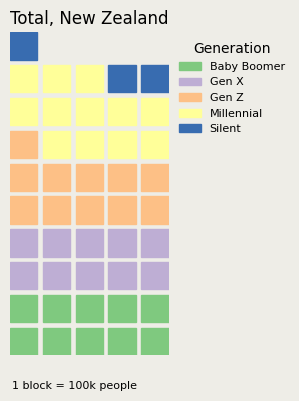

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]
scale_factor = 100000 # Each block in the waffle plot will be equal to 100k.

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot.
            "values": df_plot[col_name] / scale_factor,
            "labels": list(df_plot.index),
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 10,
            "legend": {
                "bbox_to_anchor": (
                    1,
                    1,
                ),  # Sets the coordinates for the legend relative to the axes.
                "fontsize": 8,  # Sets the font size of the text in the legend.
                "title": "Generation",  # Specifies a title for the legend.
                "frameon": False,  # False means no legend border is drawn.
            },
            "rounding_rule": "ceil",  # needed so values less than 100000 will still have at least 1 block
            "vertical": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)

fig.supxlabel(
    f"1 block = {(scale_factor//1000)}k people",
    fontsize=8,
    x=0.1,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Add proportions to legend

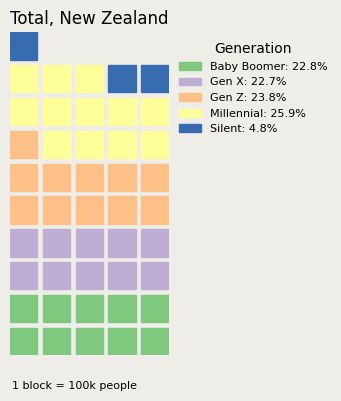

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]
scale_factor = 100000

total_population = df_plot[col_name].sum()

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            "values": df_plot[col_name] / scale_factor,
            "labels": [
                f"{index}: {value/total_population:.1%}"
                for index, value in zip(df_plot.index, df_plot[col_name])
            ],
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 10,
            "legend": {
                "bbox_to_anchor": (1, 1),
                "fontsize": 8,
                "title": "Generation",
                "frameon": False,  # Set frameon to False to remove the border
            },
            "rounding_rule": "ceil",  # needed so values less than 100000 will still have at least 1 block
            "vertical": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)

fig.supxlabel(
    f"1 block = {(scale_factor//1000)}k people",
    fontsize=8,
    x=0.1,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Data auto-scaling

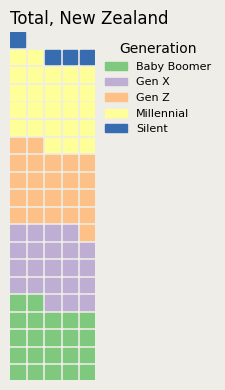

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            "values": df_plot[col_name],
            "labels": list(df_plot.index),
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 20,
            "columns": 5,  # When setting both rows and columns, the value of each block will be scaled.
            "legend": {
                "bbox_to_anchor": (1, 1),
                "fontsize": 8,
                "title": "Generation",
                "frameon": False,  # Set frameon to False to remove the border
            },
            "rounding_rule": "floor",  # When rounding_rule is ceil or nearest, sum of scaled values might
            # be greater than chart size. If so, the blocks of last category would not be shown completely in the chart.
            "vertical": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Horizontal stacking

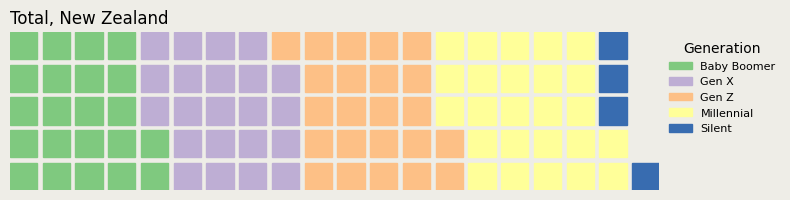

In [ ]:

# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            'values': df_plot[col_name],
            'labels': list(df_plot.index),
            'title': {'label': col_name, 'loc': 'left', 'fontsize': 12},
            'rows': 5,
            'columns': 20, # We now have more blocks so the values will be scaled
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1, 1),
                'fontsize': 8,
                'title': 'Generation',
                'frameon': False,  # Set frameon to False to remove the border
            },
            'rounding_rule': 'floor', # When rounding_rule is ceil or nearest, sum of scaled values might be greater than chart size. If so, the blocks of last category would not be shown completely in the chart.
            'vertical': False
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4)  # Overall figure size
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()

Replace blocks with icons

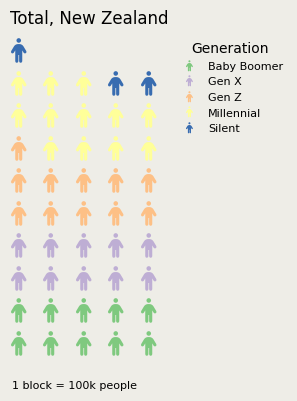

In [ ]:
# Choose data for plotting
df_plot = df_waffle_nz.copy()

# Define constants
col_name = df_plot.columns[0]
scale_factor = 100000

# Pass the axes defined by subplots to Waffle via FigureClass
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {  # This specifies that we are dealing with a single subplot
            "values": df_plot[col_name] / scale_factor,
            "labels": list(df_plot.index),
            "title": {"label": col_name, "loc": "left", "fontsize": 12},
            "rows": 10,
            "legend": {
                "loc": "upper left",
                "bbox_to_anchor": (1, 1),
                "fontsize": 8,
                "title": "Generation",
                "frameon": False,  # Set frameon to False to remove the border
            },
            "rounding_rule": "ceil",  # needed so values less than 100000 will still have at least 1 block
            "vertical": True,
            "icons": "person",  # Using person icons for representation
            "icon_size": 18,  # Adjust icon size
            "icon_legend": True,
        },
    },
    cmap_name="Accent",  # Color map name
    figsize=(8, 4),  # Overall figure size
)

fig.supxlabel(
    f"1 block = {(scale_factor//1000)}k people",
    fontsize=8,
    x=0.1,  # position at the 14% axis
)
fig.set_facecolor("#EEEDE7")

# Display the chart
plt.show()



Multiple charts horizontal with icons and legend with values

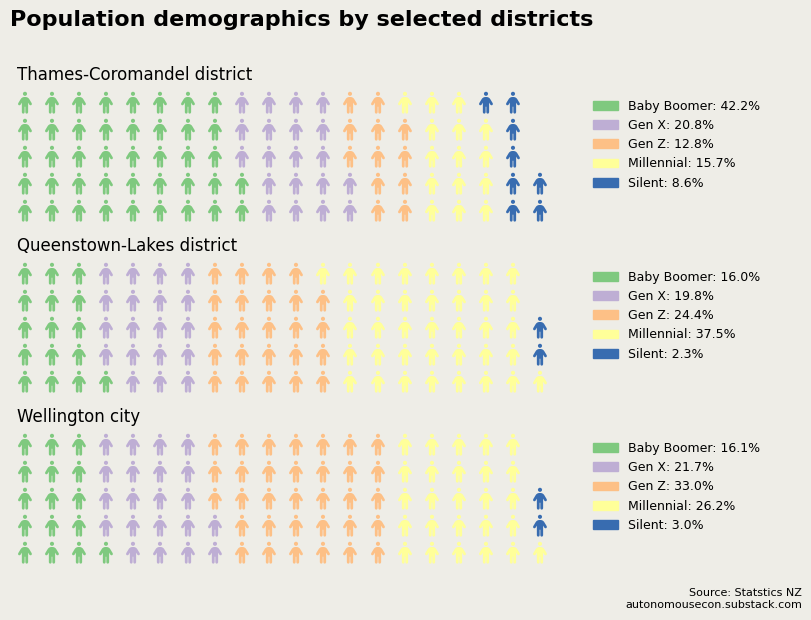

In [ ]:

# Filtering and setup as per your existing logic
region_1 = "Thames-Coromandel district"
region_2 = "Queenstown-Lakes district"
region_3 = "Wellington city"

df_waffle_region = df_waffle[
    (df_waffle["Region"].isin([region_1, region_2, region_3]))
    & (df_waffle["Generation"] != "Other")  # Remove under 15 year olds
].copy()

# Pivot the DataFrame using pivot_table
df_waffle_region = df_waffle_region.pivot_table(
    index="Generation", columns="Region", values="Population", aggfunc="sum"
)

# Function to create a plot dict for a given region
def create_plot_data(region):
    df_plot = df_waffle_region[region]
    total_population = df_plot.sum()

    values = [value for value in df_plot.tolist()]
    labels = [f"{index}: {value/total_population:.1%}" for index, value in zip(df_plot.index, df_plot)]

    plot_data = {
        "values": values,
        "labels": labels,
        "legend": {
            "loc": "upper left",
            "bbox_to_anchor": (1.05, 1),
            "fontsize": 9,
            "frameon": False,
        },
        "title": {"label": region, "loc": "left", "fontsize": 12},
        "rounding_rule": "floor",
        "icons": "person",
        "icon_size": 16,
    }
    return plot_data

plot1 = create_plot_data(region_1)
plot2 = create_plot_data(region_2)
plot3 = create_plot_data(region_3)

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Common parameter applied to all subplots.
    columns=20,
    cmap_name="Accent",
    figsize=(8, 6),
)

# Common figure settings
fig.suptitle("Population demographics by selected districts", fontsize=16, fontweight="bold", va="top", ha="left", x=0.01, y=1.01)
fig.supxlabel(f"Source: Statstics NZ\nautonomousecon.substack.com", fontsize=8, x=1, ha="right")
fig.set_facecolor("#EEEDE7")

plt.show()
